In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 🐼 Pandas Worksheet: Exploratory Analysis
---

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive




In [3]:
movie = pd.read_csv("movies.csv", index_col=0)
films = movie.columns.tolist()
films

['title', 'genres']

In [4]:
ratings = pd.read_csv("ratings.csv", index_col=0)


In [5]:
ratings

,movieId,rating,timestamp
userId,,,
1,1,4.0,964982703
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
...,...,...,...
610,166534,4.0,1493848402
610,168248,5.0,1493850091
610,168250,5.0,1494273047


---
## Ratings table

#### How many unique users and movies are in the dataset?

In [6]:
#ratings["userId"].unique()

In [7]:
#num_users = ratings["userId"].unique()
#num_movies = ratings["movieId"].unique()

# Print the results
#print("Number of unique users:", num_users)
#print("Number of unique movies:", num_movies)


#### a) What is the average rating, b) which rating appears the most?

In [8]:
ratings.mean()

movieId      1.943530e+04
rating       3.501557e+00
timestamp    1.205946e+09
dtype: float64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [9]:
rating_counts = ratings["rating"].value_counts()
rating_counts


4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [10]:
# Calculate the relative frequency of each rating
rating_freq = rating_counts / rating_counts.sum()

# Print the results
print("Relative frequency of ratings:")
print(rating_freq)


Relative frequency of ratings:
4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: rating, dtype: float64


#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [11]:
# Count the number of ratings per user
ratings_per_user = ratings.groupby("userId")["rating"].count()

# Print the results
print("Number of ratings per user:")
print(ratings_per_user)


Number of ratings per user:
userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: rating, Length: 610, dtype: int64


#### How many users have rated more than 20 movies?

In [12]:
movies_per_user = ratings.groupby("userId")["movieId"].count()

# Count the number of users who have rated more than 20 movies
num_users_rated_20plus_movies = (movies_per_user > 20).sum()

# Print the result
print("Number of users who have rated more than 20 movies:", num_users_rated_20plus_movies)


Number of users who have rated more than 20 movies: 596


#### a) How many movies rated the user with the most/ least ratings? b) What is the *median* number of ratings?

- use your results from the previous question

In [13]:

# Count the number of ratings per user
ratings_per_user = ratings.groupby("userId")["movieId"].count()

# Find the user with the most ratings and count the number of movies they rated
most_ratings_user = ratings_per_user.idxmax()
num_movies_most_ratings = ratings_per_user.loc[most_ratings_user]

# Find the user with the least ratings and count the number of movies they rated
least_ratings_user = ratings_per_user.idxmin()
num_movies_least_ratings = ratings_per_user.loc[least_ratings_user]

# Print the results
print("User with the most ratings rated", num_movies_most_ratings, "movies.")
print("User with the least ratings rated", num_movies_least_ratings, "movies.")


User with the most ratings rated 2698 movies.
User with the least ratings rated 20 movies.


#### Draw a histogram or density plot of the distribution of the number of ratings per user! How would you characterize the distribution?

- use your results from the previous question
- Hint: `sns.histplot()`

<Axes: xlabel='movieId', ylabel='Count'>

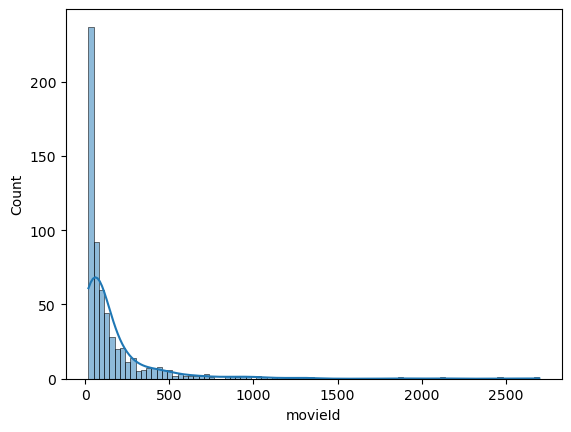

In [14]:

# create histogram using seaborn
sns.histplot(ratings_per_user, kde=True)


#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [15]:
avg_rating_per_user = ratings.groupby('userId')['rating'].mean()

avg_rating_per_user

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

In [16]:
user_id = 46
print("User", user_id, "has an average rating of", avg_rating_per_user.loc[user_id])


User 46 has an average rating of 4.0


In [17]:
user_id = 50
print("User", user_id, "has an average rating of", avg_rating_per_user.loc[user_id])


User 50 has an average rating of 2.7806451612903227


--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [18]:
movie

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [19]:
duplicated_titles = movie['title'].duplicated()
print(duplicated_titles)


movieId
1         False
2         False
3         False
4         False
5         False
          ...  
193581    False
193583    False
193585    False
193587    False
193609    False
Name: title, Length: 9742, dtype: bool


In [20]:
num_duplicated_titles = duplicated_titles.sum()
print("There are", num_duplicated_titles, "duplicated titles.")


There are 5 duplicated titles.


#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [21]:
movie

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [22]:

# Reset the index to move movieId to a regular column
movie = movie.reset_index()

# Print the first 10 rows of the DataFrame to check the result
print(movie.head(10))


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8       

In [23]:
# Get a list of all unique movieIds in the movies table
#all_movies = movie['movieId'].unique()

# Get a list of all unique movieIds in the ratings table
rated_movies = ratings['movieId'].unique()

# Check if there are any movieIds in all_movies that are not in rated_movies
unrated_movies = movie[~movie['movieId'].isin(rated_movies)]

if len(unrated_movies) > 0:
    print(f"There are {len(unrated_movies)} movies in the movies table that are not in the ratings table.")
else:
    print("All movies in the movies table are present in the ratings table.")


There are 18 movies in the movies table that are not in the ratings table.


#### ⭐Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [24]:

# Extract the year from the title column using a regular expression
movie['year'] = movie['title'].str.extract('\((\d{4})\)', expand=False)

# Print the first 10 rows of the DataFrame to check the result
print(movie.head(10))


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1                   Adventure|Children|Fantasy  1995  
2                               Comedy|Romance  1995  
3                         Comedy|Drama|Romance  1995  
4                                       Comedy  1995  
5                        Action|Crime|Thriller  1995  
6                               Comedy|Romance  1995  
7        

#### ⭐Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [25]:
# Split the genres column into a list of genres
genres_list = movie['genres'].str.split('|')

# Create a new DataFrame with one row for each genre/movieId combination
genre_df = pd.DataFrame({
    'movieId': movie['movieId'],
    'genre': genres_list
})

# Explode the genre column to create one row for each genre/movieId combination
genre_df = genre_df.explode('genre')

# Print the first 10 rows of the genre DataFrame to check the result
print(genre_df.head(10))


   movieId      genre
0        1  Adventure
0        1  Animation
0        1   Children
0        1     Comedy
0        1    Fantasy
1        2  Adventure
1        2   Children
1        2    Fantasy
2        3     Comedy
2        3    Romance


In [26]:
# Group the genre DataFrame by movieId and count the number of genres for each movie
genre_counts = genre_df.groupby('movieId').size()

# Find the movieId with the most genres assigned
most_genres_movieId = genre_counts.idxmax()

print(f"The movie with the most genres assigned is movieId {most_genres_movieId}.")


The movie with the most genres assigned is movieId 81132.


In [28]:
movie

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [35]:
# Merge the ratings and movies tables based on the movieId column
merged_df = ratings.reset_index().merge(movie, on='movieId')

# Print the first 10 rows of the merged DataFrame to check the result
print(merged_df.head(10))


   userId  movieId  rating   timestamp             title  \
0       1        1     4.0   964982703  Toy Story (1995)   
1       5        1     4.0   847434962  Toy Story (1995)   
2       7        1     4.5  1106635946  Toy Story (1995)   
3      15        1     2.5  1510577970  Toy Story (1995)   
4      17        1     4.5  1305696483  Toy Story (1995)   
5      18        1     3.5  1455209816  Toy Story (1995)   
6      19        1     4.0   965705637  Toy Story (1995)   
7      21        1     3.5  1407618878  Toy Story (1995)   
8      27        1     3.0   962685262  Toy Story (1995)   
9      31        1     5.0   850466616  Toy Story (1995)   

                                        genres  year  
0  Adventure|Animation|Children|Comedy|Fantasy  1995  
1  Adventure|Animation|Children|Comedy|Fantasy  1995  
2  Adventure|Animation|Children|Comedy|Fantasy  1995  
3  Adventure|Animation|Children|Comedy|Fantasy  1995  
4  Adventure|Animation|Children|Comedy|Fantasy  1995  
5  Advent

In [31]:
# Merge the ratings and movies tables using a left join
merged_df = ratings.merge(movie, on='movieId', how='left')
merged_df

,movieId,rating,timestamp,title,genres,year
0,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,1995
2,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,1995
3,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1995
4,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1995
...,...,...,...,...,...,...
100831,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller,2017
100832,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller,2017
100833,168250,5.0,1494273047,Get Out (2017),Horror,2017
100834,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,2017


In [36]:

# Pivot the table to get user/movie dataframe
merged_df_pivot = pd.pivot_table(merged_df, index='userId', columns='title', values='rating')

# Print the resulting dataframe
merged_df_pivot

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [39]:
merged_df_pivot.to_csv('user_movies.csv')

#### Count the number of ratings per movie title!

In [ ]:

# Group the DataFrame by movie title and count the number of ratings for each title
ratings_per_movie = merged_df.groupby('title').size()

# Print the first 10 rows of the result
print(ratings_per_movie.head(10))


#### Use your previous results: What are the top 10 most rated movies in the dataset?

In [ ]:
# Sort the ratings_per_movie Series in descending order and take the top 10 rows
top_10_rated_movies = ratings_per_movie.sort_values(ascending=False).head(10)

# Print the result
print(top_10_rated_movies)


#### Calculate the average rating per movie title!

In [ ]:

# Group the DataFrame by movie title and calculate the mean rating for each title
avg_rating_per_movie = merged_df.groupby('title')['rating'].mean()

# Print the first 10 rows of the result
print(avg_rating_per_movie.head(10))


#### Which movie was rated the best? Which movie was rated the worst?

- ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? 

In [ ]:
# Filter out movies that have been rated by less than 30 users
popular_movies = avg_rating_per_movie.loc[ratings_per_movie >= 30]

# Find the best rated and worst rated movies among the popular movies
best_rated_popular_movie = popular_movies.sort_values(ascending=False).head(1)
worst_rated_popular_movie = popular_movies.sort_values(ascending=True).head(1)

# Print the results
print(f"The best rated popular movie is '{best_rated_popular_movie.index[0]}' with an average rating of {best_rated_popular_movie.values[0]:.2f}.")
print(f"The worst rated popular movie is '{worst_rated_popular_movie.index[0]}' with an average rating of {worst_rated_popular_movie.values[0]:.2f}.")


In [ ]:
merged_df.to_csv('data.csv', index=False)

In [ ]:
merged_df